## Plant Disease Prediction using CNN

Important Library

In [1]:
import pandas as pd 
import numpy as  np 
import matplotlib.pyplot as plt 
import matplotlib.image as img
from keras.preprocessing.image import ImageDataGenerator
from keras import layers , models

Load & Inspection the Dataset

(256, 256, 3)


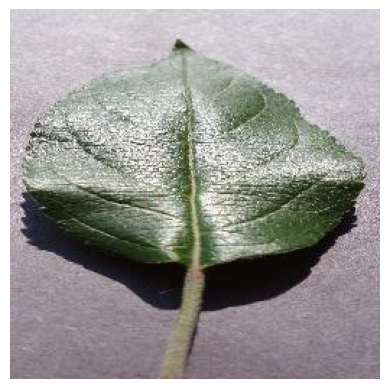

In [2]:
image_path = "../Data/plantvillage-dataset/color/Apple___healthy/0a02e8cb-b715-497f-a16a-c28b3409f927___RS_HL 7432.JPG"
img = img.imread(image_path)
print(img.shape) 

# Display the image 
plt.imshow(img) 
plt.axis('off')
plt.show()

In [3]:
print(img)

[[[214 209 216]
  [208 203 210]
  [207 202 209]
  ...
  [206 201 208]
  [203 198 205]
  [201 196 203]]

 [[211 206 213]
  [208 203 210]
  [208 203 210]
  ...
  [211 206 213]
  [213 208 215]
  [214 209 216]]

 [[210 205 212]
  [208 203 210]
  [209 204 211]
  ...
  [213 208 215]
  [218 213 220]
  [221 216 223]]

 ...

 [[140 129 137]
  [137 126 134]
  [131 120 128]
  ...
  [141 129 139]
  [141 129 139]
  [136 124 134]]

 [[137 126 134]
  [135 124 132]
  [133 122 130]
  ...
  [138 126 136]
  [138 126 136]
  [133 121 131]]

 [[133 122 130]
  [134 123 131]
  [136 125 133]
  ...
  [132 120 130]
  [133 121 131]
  [128 116 126]]]


Splitting the Dataset

In [8]:
gen_data = ImageDataGenerator(
    rescale=1./255 ,
    validation_split=0.2 ,
    shear_range=0.1 , 
    zoom_range= 0.1 ,
    horizontal_flip=True 
)

# Main Directory 
main_dir = "../Data/plantvillage-dataset/color"

# Train 
train = gen_data.flow_from_directory(
    directory=main_dir ,
    target_size=(220 ,220) ,
    batch_size=  32 , 
    subset='training' ,
    class_mode='categorical'
)

# Validation 
validate = gen_data.flow_from_directory(
    directory=main_dir,
    target_size=(220 ,220),
    batch_size=32,
    subset='validation',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


Apply the Convolutional Neural Network (CNN) 

In [ ]:
model = models.Sequential()

# Convolutional Block 1
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(220,220,3)))
model.add(layers.MaxPooling2D((2,2)))

# Convolutional Block 2
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

# Convolutional Block 3
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

# Flatten + Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))   

# Output layer
model.add(layers.Dense(train_gen.num_classes, activation='softmax'))


In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 220, 220, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 55, 55, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 27, 27, 128)     

In [11]:
model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy']) 

Model Training

In [12]:
history = model.fit(
    train,
    steps_per_epoch=1000,   # use only 1000 steps per epoch
    epochs=5,
    validation_data=validate,
    validation_steps=200    # use 200 steps for validation
)

Epoch 1/5
1000/1000 [==============================] - 1298s 1s/step - loss: 1.6834 - accuracy: 0.5339 - val_loss: 0.9410 - val_accuracy: 0.7061
Epoch 2/5
1000/1000 [==============================] - 1215s 1s/step - loss: 0.9517 - accuracy: 0.7126 - val_loss: 0.5995 - val_accuracy: 0.8102
Epoch 3/5
1000/1000 [==============================] - 1169s 1s/step - loss: 0.7339 - accuracy: 0.7746 - val_loss: 0.4021 - val_accuracy: 0.8731
Epoch 4/5
1000/1000 [==============================] - 1171s 1s/step - loss: 0.6142 - accuracy: 0.8083 - val_loss: 0.3382 - val_accuracy: 0.8919
Epoch 5/5
1000/1000 [==============================] - 1276s 1s/step - loss: 0.5372 - accuracy: 0.8332 - val_loss: 0.2666 - val_accuracy: 0.9119


Model Evaluation

In [14]:
print("Model Evaluation.....")
val_loss, val_accuracy = model.evaluate(
    validate,
    steps=validate.samples // validate.batch_size,
    verbose=1
)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Model Evaluation.....
339/339 [==============================] - 127s 373ms/step - loss: 0.2633 - accuracy: 0.9143
Validation Accuracy: 91.43%


Plotting

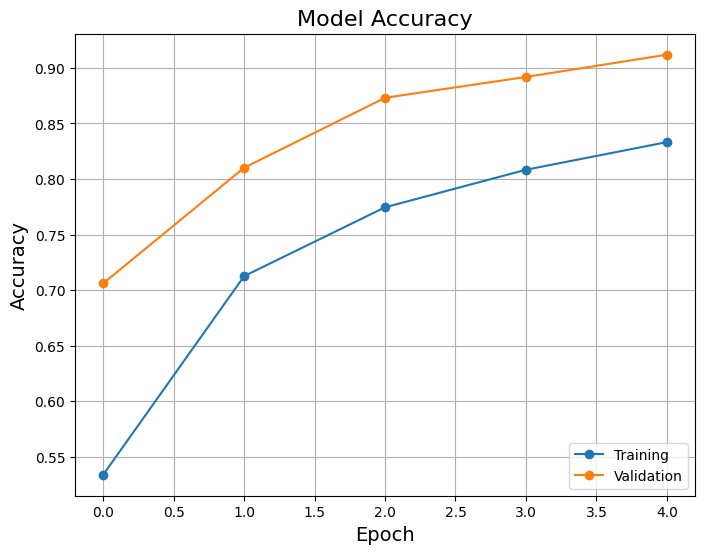

In [15]:
# Accuracy plot
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], marker='o')
plt.plot(history.history['val_accuracy'], marker='o')
plt.title('Model Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training', 'Validation'], loc='lower right')
plt.grid(True)
plt.show()

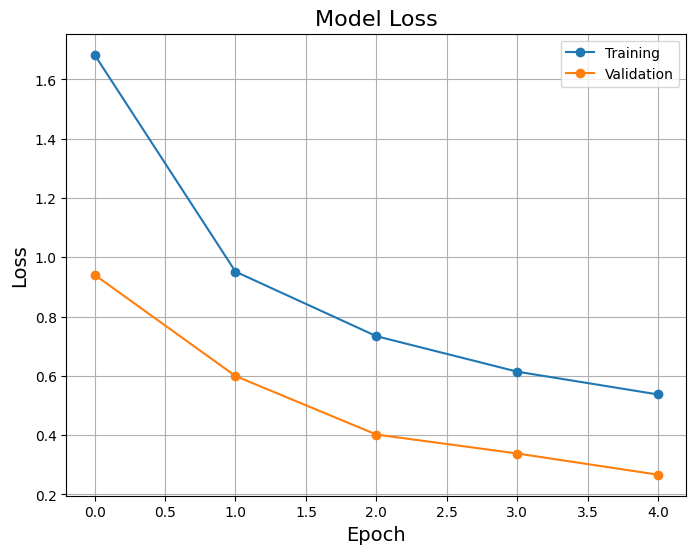

In [16]:
# Loss plot
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], marker='o')
plt.plot(history.history['val_loss'], marker='o')
plt.title('Model Loss', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()

Prediction system

In [28]:
from PIL import Image

def load_and_preprocess_image(img_path, target_size=(220, 220)):
    img = Image.open(img_path)
    img = img.resize(target_size)
    img_to_numpy_array = np.array(img)
    img_dimension = np.expand_dims(img_to_numpy_array, axis=0)
    img_scaling = img_dimension.astype('float32') / 255.0
    return img_scaling

def prediction_system(model, img_path, class_indices):
    preprocessed_img = load_and_preprocess_image(img_path)
    prediction = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [29]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train.class_indices.items()}

In [30]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [35]:
test_img_path = "../Data/plantvillage-dataset/color/Tomato___Spider_mites Two-spotted_spider_mite/eaa10d61-de43-4eb3-9008-07d2d436005d___Com.G_SpM_FL 9003.JPG"
predicted_class = prediction_system(model, test_img_path, class_indices)

print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 46ms/step
Predicted Class: Tomato___Spider_mites Two-spotted_spider_mite


Save the Model

In [36]:
import json
json.dump(class_indices, open('../Results/class_indices.json', 'w'))

In [37]:
model.save('../Models/plant_disease_prediction_model.h5')